## Цель работы: изучение и анализ поисковых алгоритмов минимизации функции одной переменной: дихотомического, Фибоначчи и «золотого сечения».

## Вариант 10
$$
f(x) =-\frac{x}{e^x}, a = 0, b = 3
$$

### Реализация методов

In [1]:
class OneDimensionalOptimization:
    def __init__(self, a, b, func):
        self.a, self.b = a, b
        self.func = func

    def dihotomy(self, eps = 0.001):
        a, b = self.a, self.b
        size = b - a
        iter = 0
        
        while (size > 2*eps):
            center = (a+b)/2
            x1, x2 = center - eps/2, center + eps/2
            
            if self.func(x1) > self.func(x2):
                a = x1
            else:
                b = x2

            size = b - a
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return self.func((a+b)/2), iter*2

    def nums(self, n):
        res = []
        fib1 = fib2 = 1
        res.append(fib1)
        res.append(fib2)
        n -= 2
         
        while n > 0:
            fib1, fib2 = fib2, fib1 + fib2
            res.append(fib2)
            n -= 1
            
        return res

    def num(self, n):
        if n in (1, 2):
            return 1
        return self.num(n - 1) + self.num(n - 2)

    def fibonacci(self, eps = 0.001):
        a, b = self.a, self.b
        limit = (b-a)/eps
        n = 0
        Fn = 0
        while (Fn <= limit):
            n+=1
            Fn = self.num(n)       
            
        F, L = self.nums(n), b - a
        f1, f2 = 0, 0
        k = n - 1
        iter = 0
        
        while (k > 1):
            delta = (F[k-1]/F[k])*L
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)
            k -= 1
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return min(f1, f2), iter

    def golden_ratio(self, tau = 0.618, eps = 0.001):
        a, b = self.a, self.b
        L = b - a
        iter = 0
        f1, f2 = 0, 0

        while(L > eps):
            delta =  L*tau
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
    
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
    
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)

            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')
                
        return min(f1, f2), iter
    
    def binary_division(self, deriv, eps = 0.001):
        a = self.a
        b = self.b
        iter = 0
        treshold = 2*eps/(b-a)
        n=0

        while (0.5**n < treshold):
            n+=1

        k = 0
        
        while(k < n-1):
            k +=1
            x = (a+b)/2
            der_value = deriv(x)
            if der_value == 0:
                return self.func(x)
            elif der_value > 0:
                b = x
            else:
                a = x

            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return self.func((a+b)/2), iter

            


### Тестирование

In [2]:
import math
odo = OneDimensionalOptimization(0, 3, lambda x: -x/math.exp(x))

In [3]:
dih = odo.dihotomy(eps = 0.1)
print(dih)

iter: 1 | set: [0,1.55]
iter: 2 | set: [0.725,1.55]
iter: 3 | set: [0.725,1.1875]
iter: 4 | set: [0.90625,1.1875]
iter: 5 | set: [0.90625,1.096875]
(-0.3678789925673678, 5)


In [4]:
fib = odo.fibonacci(eps = 0.1)
print(fib)

iter: 1 | set: [0,1.8529411764705883]
iter: 2 | set: [0.7058823529411764,1.8529411764705883]
iter: 3 | set: [0.7058823529411764,1.411764705882353]
iter: 4 | set: [0.7058823529411764,1.1470588235294117]
iter: 5 | set: [0.8823529411764706,1.1470588235294117]
iter: 6 | set: [0.8823529411764706,1.0588235294117647]
iter: 7 | set: [0.9705882352941176,1.0588235294117647]
(-0.3677171691342093, 7)


In [5]:
gld = odo.golden_ratio(eps = 0.1)
print(gld)

iter: 1 | set: [0,1.854]
iter: 2 | set: [0.7082280000000001,1.854]
iter: 3 | set: [0.7082280000000001,1.416315096]
iter: 4 | set: [0.7082280000000001,1.145825825328]
iter: 5 | set: [0.875390369275296,1.145825825328]
iter: 6 | set: [0.875390369275296,1.0425194811158671]
iter: 7 | set: [0.9392336899983942,1.0425194811158671]
iter: 8 | set: [0.9786888622052689,1.0425194811158671]
(-0.36787771750385473, 8)


In [ ]:
bin = odo.binary_division(eps = 0.1)
print(bin)

### Составление таблиц

In [6]:
import numpy as np

In [7]:
eps_set = np.arange(0.001, 0.1, 0.01)

In [ ]:
results_dih = []
results_gld = []
results_fib = []
results_bin = []
for i in eps_set:
    results_dih.append(odo.dihotomy(eps = i)[0])
    results_gld.append(odo.fibonacci(eps = i)[0])
    results_fib.append(odo.golden_ratio(eps = i)[0])
    results_bin.append(odo.binary_division(eps = i)[0])

In [9]:
import pandas as pd

C:\Users\ziabr\AppData\Local\Temp\ipykernel_15912\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
dih_gld = pd.DataFrame(data = {'eps': eps_set, 'dihotomy': results_dih, 'fibonacci': results_fib, 'golden_ratio': results_gld})

In [11]:
dih_gld

,eps,dihotomy,fibonacci,golden_ratio
0,0.001,-0.367879,-0.367879,-0.367879
1,0.011,-0.367879,-0.367879,-0.367879
2,0.021,-0.367874,-0.367878,-0.367878
3,0.031,-0.367879,-0.367878,-0.367878
4,0.041,-0.367878,-0.367878,-0.367878
5,0.051,-0.367832,-0.367878,-0.367878
6,0.061,-0.367822,-0.367878,-0.367878
7,0.071,-0.367811,-0.367878,-0.367878
8,0.081,-0.367799,-0.367878,-0.367878
9,0.091,-0.367879,-0.367878,-0.367878


### Графики

In [ ]:
eps_set = np.arange(0.001, 0.1, 0.001)
iters_dih = []
iters_gld = []
iters_fib = []
for i in eps_set:
    iters_dih.append(odo.dihotomy(eps = i)[1])
    iters_gld.append(odo.golden_ratio(eps = i)[1])
    iters_fib.append(odo.fibonacci(eps = i)[1])

In [13]:
eps_set = np.log(eps_set)

In [14]:
import matplotlib.pyplot as plt

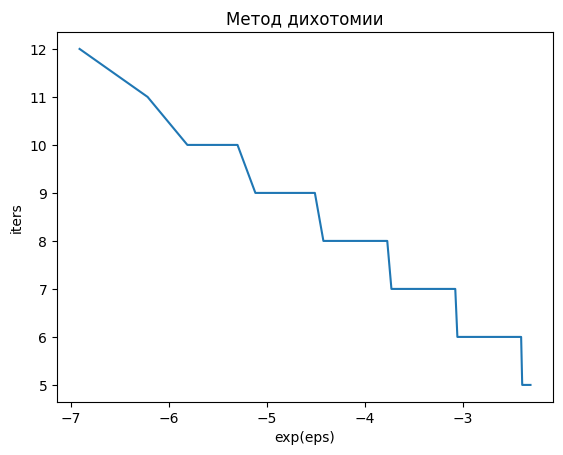

In [19]:
plt.plot(eps_set, iters_dih)
plt.title("Метод дихотомии")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()

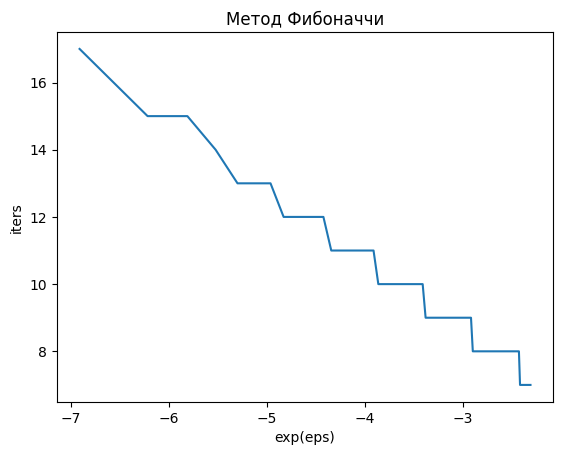

In [20]:
plt.plot(eps_set, iters_fib)
plt.title("Метод Фибоначчи")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()

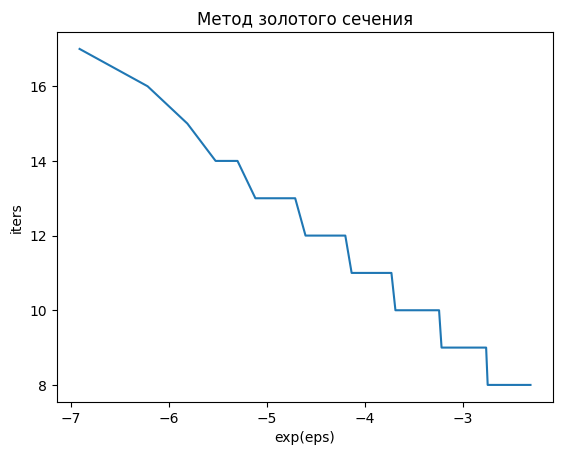

In [21]:
plt.plot(eps_set, iters_gld)
plt.title("Метод золотого сечения")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()